In [87]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

In [88]:
gun_data_with_zipcode = pd.read_csv("GunData_withZipcode")
income_data = pd.read_csv("income_database.csv", encoding='latin1')

/home/nilkanth/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
print(gun_data_with_zipcode.shape)
gun_data_with_zipcode.drop_duplicates(subset=['incident_id'], keep=False, inplace=True)
print(gun_data_with_zipcode.shape)

(231754, 31)
(231754, 31)


In [90]:
income_data.head(5)

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638
1,1011001,1,Alabama,AL,Talladega County,Childersburg,Childersburg city,City,place,35044,256,31919335,652240,33.291877,-86.340599,39421,25400,43141,1642
2,1011002,1,Alabama,AL,Calhoun County,Anniston,Choccolocco,CDP,place,36207,256,30159923,239225,33.674346,-85.710918,73511,54847,62988,554
3,1011003,1,Alabama,AL,Mobile County,Wilmer,Chunchula,CDP,place,36587,251,4671130,21008,30.927194,-88.208200,34753,300000,28467,55
4,1011004,1,Alabama,AL,Mobile County,Citronelle,Citronelle city,City,place,36522,251,66930189,713078,31.097269,-88.249843,56102,48865,44810,892


In [91]:
income_data.rename(columns={'Zip_Code': 'Zipcode'}, inplace=True)

In [92]:
print(income_data.shape)
income_data.drop_duplicates(subset=['Zipcode'], keep= "last", inplace=True)
print(income_data.shape)

(325259, 19)
(22109, 19)


In [93]:
result = pd.merge(gun_data_with_zipcode,income_data,on='Zipcode',how='left')

In [94]:
result.head(6)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,Primary,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,Track,412,2044622.0,200574.0,40.333213,-79.843633,51174.0,35169.0,48665.0,392.0
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,Track,310,937510.0,0.0,33.889392,-118.322347,87496.0,77137.0,60739.0,699.0
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,Track,440,7941068.0,48525.0,41.412195,-82.127277,54357.0,43887.0,41509.0,298.0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,Track,720,1730312.0,0.0,39.645536,-104.803854,78492.0,73500.0,48146.0,772.0
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,Track,336,25484693.0,199628.0,36.156962,-79.948558,116784.0,106241.0,69994.0,564.0
5,5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,...,Track,918,18982198.0,27864.0,36.255179,-95.950726,44750.0,32266.0,40480.0,605.0


In [95]:
result = result[np.isfinite(result['sum_w'])]

In [96]:
result.isnull().sum(axis = 0)

Unnamed: 0                          0
incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         13631
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        392
incident_url_fields_missing         0
congressional_district           3678
gun_stolen                      92462
gun_type                        92440
incident_characteristics          297
latitude                            0
location_description           177250
longitude                           0
n_guns_involved                 92440
notes                           73037
participant_age                 83617
participant_age_group           37899
participant_gender              32657
participant_name               112147
participant_relationship       200650
participant_status              24682
participant_

In [97]:
#joined_data.to_csv("Joined_dataset.csv")

In [98]:
sorted_on_date = result.sort_values(by = "date", ascending= False)

In [99]:
sorted_on_date['date'] = pd.to_datetime(sorted_on_date['date'])  

In [100]:
mask = (sorted_on_date['date'] > '2018-1-1')
greater_than_2018 = sorted_on_date.loc[mask]
mask2 = (sorted_on_date['date'] > '2017-1-1') & (sorted_on_date['date'] < '2018-1-1')
greater_than_2017 = sorted_on_date.loc[mask2]

In [101]:
sorted_on_date.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'Zipcode', 'id', 'State_Code', 'State_Name',
       'State_ab', 'County', 'City', 'Place', 'Type', 'Primary', 'Area_Code',
       'ALand', 'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

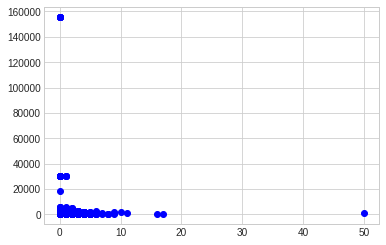

In [102]:
plt.plot(result["n_killed"],result["sum_w"],'o', color='blue')

In [103]:
 # use the function regplot to make a scatterplot
#sns.regplot(x=joined_data["n_killed"], y=joined_data["sum_w"])
#sns.plt.show()

In [104]:
clean_df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'latitude', 'longitude',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'Zipcode', 'State_Code', 'State_Name',
       'State_ab', 'County', 'City', 'Place', 'Type', 'Primary', 'Area_Code',
       'ALand', 'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

In [105]:
result['state'] = result['state'].str.lower()

    # State and reverse state

In [107]:
state_dict = {}
revert_state_dict = {}
iterator = -1
for index, row in result.iterrows():
    if row['state'] in state_dict.keys():
        continue
    else:
        state_dict[row['state']] = iterator
        revert_state_dict[iterator] = row['state']
    iterator-=1

In [108]:
common_states = []
for index, row in result.iterrows():
    t = [state_dict[row['state']],1]
    common_states.append(t)

In [109]:
from itertools import combinations
from pyspark import SparkContext, SparkConf
import collections
import sys
from collections import defaultdict

def son_phase1_singletons(incidents):
    global parallel_data_support_threshold

    counter_dict = defaultdict(int)
    for i in incidents:
        counter_dict[i] += 1

    chunk_output = []
    for k,v in counter_dict.items():
        if v >= parallel_data_support_threshold:
            chunk_output.append(k)
    return chunk_output


def son_phase2_singletons(input_set, candidates):
    global support_thresh
    counter_dict = defaultdict(int)
    for i in input_set:
        if i in candidates:
            counter_dict[i] += 1

    output = []
    support_count = defaultdict(int)
    for k,v in counter_dict.items():
        if v >= support_thresh:
            output.append(k)
        else:
            del counter_dict[k]
    return output, counter_dict

def generate_pairs(elements):
    pairs = set()
    elements.sort()
    for i in elements:
        for j in elements:
            if i != j:
                pairs.add((i,j))
    pairs = list(pairs)
    return pairs

def son_phase1_pairs(input_pairs):
    global parallel_data_support_threshold_2
    counter_dict_2 = defaultdict(int)
    for i in input_pairs:
        counter_dict_2[i]+=1

    candidate_pairs_2 = []
    for k,v in counter_dict_2.items():
        if v>= parallel_data_support_threshold_2:
            candidate_pairs_2.append(k)
    return candidate_pairs_2

def son_phase2_pairs(input_set, candidates):
    global support_thresh
    counter_dict = defaultdict(int)
    for i in input_set:
        if i in candidates:
            counter_dict[i] += 1

    output = []
    support_count = defaultdict(int)
    for k,v in counter_dict.items():
        if v >= support_thresh:
            output.append(k)
        else:
            del counter_dict[k]
    return output, counter_dict

def get_rules_phase1(frequent_candidates):
    global input_data
    temp_res = set()
    for i in input_data:
        for j in frequent_candidates:
            for k in j:
                if k in i:
                    temp_res.add(j)

    return temp_res


def get_rules_phase2(frequent_candidates):
    global candidates_2, condifence
    temp_res = set()
    counter_dict = defaultdict(int)
    for i in candidates_2:
        for j in frequent_candidates:
            for k in j:
                if k in i:
                    counter_dict[k] +=1
            if j in i:
                counter_dict[j]+=1

    condifence_dict = defaultdict()
    result = []
    for j in frequent_candidates:
        condifence_dict[j] = counter_dict[j]/len(frequent_candidates)
        min_con = 100000
        for k in j:
            condifence_dict[k] = counter_dict[j]/ counter_dict[k]
            if condifence_dict[k] >= min_con:
                min_con = condifence_dict[k]
            if min_con >= condifence:
                result.append((j, min_con))
    return temp_res


def generate_frequent_singletons(input_data, support_thresh):
    SparkContext.setSystemProperty('spark.executor.memory', '5g')
    sc = SparkContext('local[*]')
    parallel_data = sc.parallelize(input_data, len(input_data)/2)
    parallel_data_support_threshold = support_thresh/parallel_data.getNumPartitions()
    candidates = parallel_data.mapPartitions(son_phase1_singletons).distinct().collect()
    result, count_of_keys = son_phase2_singletons(input_data , candidates)
    return result,count_of_keys

def find_frequent_patterns(input_data, support_thresh):
    SparkContext.setSystemProperty('spark.executor.memory', '5g')
    sc = SparkContext('local[*]')
    result, count_dict = generate_frequent_singletons(input_data, support_thresh)
    candidate_pairs = generate_pairs(result)

    parallel_data_2 = sc.parallelize(candidate_pairs, len(input_data) / 2)
    parallel_data_support_threshold_2 = support_thresh / parallel_data_2.getNumPartitions()
    candidates_2 = parallel_data_2.mapPartitions(son_phase1_pairs).distinct().collect()

    result_pair, count_of_keys_2 = son_phase2_singletons(input_data, candidates_2)
    return result_pair, count_of_keys_2

def generate_association_rules(input_data,frequent_candidates_main, confidence):
    SparkContext.setSystemProperty('spark.executor.memory', '5g')
    sc = SparkContext('local[*]')
    parallel_frequents = sc.parallelize(frequent_candidates_main, len(frequent_candidates_main) / 2)
    candidates_2 = parallel_frequents.mapPartitions(get_rules_phase1).distinct().collect()
    rules_result = parallel_frequents.mapPartitions(get_rules_phase2).distinct().collect()
    return rules_result

In [110]:
common_states = []
states_and_dead = []
stated_and_injured = []
stated_and_harmed = []
zipcode_and_harmed = []
for index, row in result.iterrows():
    t = [state_dict[row['state']],1]
    u = [state_dict[row['state']],row['n_injured']]
    v = [state_dict[row['state']],row['n_killed']]
    w = [state_dict[row['state']],row['n_injured']+ row['n_killed']]
    x = [state_dict[row['state']],row['Zipcode']]
    common_states.append(t)
    states_and_dead.append(v)
    stated_and_injured.append(u)
    stated_and_harmed.append(w)
    zipcode_and_harmed.append(x)

# MOST COMMON STATE

In [112]:
patterns_states_freq = generate_frequent_singletons(common_states, len(common_states)/100)
print(patterns_states_freq)
rules_states_freq = generate_association_rules(common_states,patterns, 0.7)
print("\n\n\n Rules: \n")
print(rules_states_freq)

{(-41,): 2172, (-41, 1): 2172, (-42,): 2589, (-42, 1): 2589, (-33,): 2782, (-33, 1): 2782, (-4,): 2850, (-4, 1): 2850, (-22,): 2880, (-22, 1): 2880, (-12,): 2914, (-12, 1): 2914, (-19,): 2951, (-19, 1): 2951, (-6,): 2985, (-6, 1): 2985, (-25,): 3673, (-25, 1): 3673, (-28,): 4434, (-28, 1): 4434, (-31,): 4873, (-31, 1): 4873, (-26,): 5095, (-26, 1): 5095, (-27,): 5101, (-27, 1): 5101, (-16,): 5237, (-16, 1): 5237, (-18,): 5277, (-18, 1): 5277, (-38,): 5315, (-38, 1): 5315, (-9,): 5456, (-9, 1): 5456, (-11,): 5903, (-11, 1): 5903, (-23,): 6437, (-23, 1): 6437, (-10,): 6651, (-10, 1): 6651, (-8,): 7102, (-8, 1): 7102, (-1,): 7725, (-1, 1): 7725, (-5,): 7958, (-5, 1): 7958, (-17,): 8165, (-17, 1): 8165, (-20,): 8895, (-20, 1): 8895, (-3,): 9593, (-3, 1): 9593, (-30,): 11792, (-30, 1): 11792, (-21,): 13922, (-21, 1): 13922, (-2,): 15184, (-2, 1): 15184, (-13,): 16261, (-13, 1): 16261, (1,): 214145}



 Rules: 

{(5,): ((1, 2), 1.0), (1, 5): ((2,), 1.0), (2, 5): ((1,), 1.0), (4,): ((2,), 1.0

# STATE TO TYPICAL DEATHS

In [113]:
patterns_states_harmed = generate_frequent_singletons(stated_and_harmed, len(stated_and_harmed)/100)
print(patterns_states_harmed)
rules_states_harmed = generate_association_rules(stated_and_harmed,patterns_states_harmed, 0.2)
print("\n\n\n Rules: \n")
print(rules_states_harmed)

{(-41,): 2172, (-42,): 2589, (-33,): 2782, (-4,): 2850, (-22,): 2880, (-12,): 2914, (-19,): 2951, (-6,): 2985, (-25,): 3673, (3,): 3801, (-28,): 4434, (-31,): 4873, (-31, 1): 2870, (-26, 1): 2237, (-26, 0): 2336, (-27,): 5101, (-27, 1): 2860, (-16, 0): 2176, (-16, 1): 2458, (-18,): 5277, (-18, 1): 2759, (-38,): 5315, (-38, 0): 3726, (-9,): 5456, (-9, 1): 3233, (-11,): 5903, (-11, 1): 3112, (-23, 0): 2905, (-23, 1): 2949, (-10, 0): 2256, (-10, 1): 3646, (-8, 0): 2483, (-8, 1): 3811, (-1, 0): 2468, (-1, 1): 4279, (-5, 0): 2961, (-5, 1): 4096, (-17, 0): 3531, (-17, 1): 3736, (-20, 0): 3818, (-20, 1): 4187, (-3, 0): 3346, (-3, 1): 5222, (-30, 0): 4310, (-30, 1): 5970, (-21, 1): 6092, (-21, 0): 6219, (-2, 0): 5846, (-2, 1): 7311, (-13, 0): 3608, (-13, 1): 10357, (2,): 17669, (0,): 86447, (1,): 104326}



 Rules: 

{(-31,): ((1,), 0.5889595731582188), (-27,): ((1,), 0.5606743775730249), (-18,): ((1,), 0.5228349440970248), (-38,): ((0,), 0.7010348071495767), (-9,): ((1,), 0.5925586510263929),

# ZIPCODE TO TYPE/CAUSE OF SHOOTING

In [117]:
incident_desc = {}
reverse_desc = {}
iterator = 1
for index, row in result.iterrows():
    if type(row['incident_characteristics']) == type(0.0):
        continue
    #print(row['incident_characteristics'])
    t = row['incident_characteristics'].split("||")
    for i in t:
        if i in incident_desc.keys():
            continue
        else:
            reverse_desc[iterator] = i
            incident_desc[i] = iterator
            iterator+=1

In [119]:
incident_char_list = []
for index, row in result.iterrows():
    if type(row['incident_characteristics']) == type(0.0):
        continue
    #print(row['incident_characteristics'])
    t = row['incident_characteristics'].split("||")
    for i in t:
        temp = [incident_desc[i], row['Zipcode']]
        incident_char_list.append(temp)

In [121]:
incident_char_list_pattern = find_frequent_patterns(incident_char_list, 0.5)
incident_char_list_rules = generate_association_rules(incident_char_list,incident_char_list_pattern, 0.5)
print("\n\n\n Rules: \n")
print(incident_char_list_rules)




 Rules: 

{(27617,): ((60,), 0.6710526315789473), (23704,): ((1,), 0.5825242718446602), (23523,): ((1,), 0.5229357798165137), (33607,): ((60,), 0.6363636363636364), (33126,): ((60,), 0.5132743362831859), (33004,): ((60,), 0.51875), (77061,): ((60,), 0.5714285714285714), (75235,): ((60,), 0.6073619631901841), (82609,): ((7,), 0.5930521091811415)}


   ## GENDER TO NUMBER KILLED

In [122]:
gender_vs_number_killed = []
for index, row in result.iterrows():
    if type(row['participant_gender']) == type(0.0):
        continue
    #print(row['incident_characteristics'])
    
    t = row['participant_gender'].split("||")
    for i in t:
        sex = -1
        if "Male" in i:
            sex = -1000
        elif "Female" in i:
            sex = 1000
        else:
            sex = 2000
        temp = [sex,row['n_killed']]
        gender_vs_number_killed.append(temp)

In [123]:
gender_vs_killed_pattern = find_frequent_patterns(gender_vs_number_killed, len(gender_vs_number_killed)/10000)
print(gender_vs_killed_pattern)
gender_vs_killed_rules = generate_association_rules(gender_vs_number_killed,gender_vs_killed_pattern, 0.2)
print("\n Rules: \n")
print(gender_vs_killed_rules)

{(17,): 35, (6,): 71, (-1000, 6): 44, (50,): 78, (-1000, 50): 61, (5, 1000): 73, (-1000, 5): 104, (4, 1000): 203, (-1000, 4): 345, (3, 1000): 664, (-1000, 3): 1277, (2, 1000): 2809, (-1000, 2): 7286, (1, 1000): 8070, (0, 1000): 25423, (1,): 74329, (-1000, 1): 66259, (0,): 223586, (-1000, 0): 198163, (-1000,): 273627}

 Rules: 

{(6,): ((-1000,), 0.6197183098591549), (50,): ((-1000,), 0.782051282051282), (-1000,): ((0,), 0.7242085028158771), (1,): ((-1000,), 0.891428648306852), (0,): ((-1000,), 0.8862943118084317)}


In [124]:
gender_vs_killed_rules = generate_association_rules(gender_vs_number_killed,gender_vs_killed_pattern, 0.75)
print("\n Rules: \n")
print(gender_vs_killed_rules)


 Rules: 

{(50,): ((-1000,), 0.782051282051282), (1,): ((-1000,), 0.891428648306852), (0,): ((-1000,), 0.8862943118084317)}


In [125]:
def roundUpToMultiple(number, multiple):
    num = number + (multiple - 1)
    return num - (num % multiple)

## INCOME TO NUMBER OF PEOPLE KILLED

In [126]:
killings_to_income = []
for index, row in result.iterrows():
    if float(row['Median']) == 0.0:
        continue
    temp = [roundUpToMultiple(float(row['Median']), 100),row['n_killed']]
    killings_to_income.append(temp)

In [127]:
killings_to_income_pattern = find_frequent_patterns(killings_to_income, len(killings_to_income)/250)
print(killings_to_income_pattern)
killings_to_income_rules = generate_association_rules(killings_to_income,killings_to_income_pattern, 0.2)
print("\n Rules: \n")
print(killings_to_income_rules)

{(38100.0,): 875, (17900.0,): 880, (29100.0,): 893, (35000.0,): 980, (41400.0,): 1006, (51600.0,): 1041, (0, 51600.0): 883, (20300.0,): 1055, (0, 20300.0): 865, (25700.0,): 1543, (0, 25700.0): 1291, (2,): 3823, (1, 300000.0): 1778, (0, 300000.0): 8027, (1,): 40898, (0,): 160540}

 Rules: 

{(51600.0,): ((0,), 0.8482228626320846), (20300.0,): ((0,), 0.8199052132701422), (25700.0,): ((0,), 0.8366817887232664)}


# Most frequent State 

In [128]:
df_temp = result[np.isfinite(result['state_house_district'])]

In [129]:
state_house_dstrict = []
for index, row in df_temp.iterrows():
    temp = [state_dict[row['state']]]
    state_house_dstrict.append(temp)

In [130]:
state_house_dstrict_pattern = find_frequent_patterns(state_house_dstrict, len(state_house_dstrict)/100)
print(state_house_dstrict_pattern)
state_house_dstrict_rules = generate_association_rules(state_house_dstrict,state_house_dstrict_pattern, 0.2)

{(-45,): 2027, (-24,): 2028, (-41,): 2155, (-42,): 2559, (-33,): 2759, (-4,): 2812, (-22,): 2851, (-19,): 2895, (-6,): 2958, (-9,): 4198, (-28,): 4379, (-31,): 4727, (-26,): 5013, (-27,): 5081, (-16,): 5126, (-18,): 5218, (-11,): 5856, (-23,): 6356, (-10,): 6637, (-8,): 6976, (-5,): 7851, (-17,): 8096, (-20,): 8788, (-3,): 9472, (-30,): 9620, (-21,): 13782, (-2,): 14994, (-13,): 16048}
